# Analyze output parameters

Generates an example set of parameters given the best params of a previous simulation, and analyze them.

In [1]:
import csv
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
from scipy.stats import multivariate_normal

SIZE = 1000
PARAMETER_COLUMNS = ['P', 'beta', 'scale_beta', 't_inc', 'scale_ea', 't_i', 'delta', 'phi', 'scale_s']

### 1. Generate a set of parameters using a multivariate normal

In [2]:
def generate_multivariate_normal_parameters(dataframe):
    parameters_matrix = dataframe[PARAMETER_COLUMNS].values.T  # one row per parameter
    params_mean = parameters_matrix.mean(axis=1)
    params_cov = np.cov(parameters_matrix)
    return {"mean": params_mean, "cov": params_cov}


def generate_parameters_with_multivariate_normal(multivariate_parameters):
    return multivariate_normal.rvs(size=SIZE, **multivariate_parameters)

# Read the simulation output
parameters_path = "../output/grouped_accepted_params_score.csv"
params_df = pd.read_csv(parameters_path)

# Generate samples with the multivariate normal
mvn = generate_multivariate_normal_parameters(params_df)
mvn_samples = generate_parameters_with_multivariate_normal(mvn)

# Reindex of the dataframe
df = pd.DataFrame(mvn_samples, columns=PARAMETER_COLUMNS)
df['id'] = range(1, SIZE + 1)
df = df[['id', *PARAMETER_COLUMNS]]
df.head()

id    P      beta  scale_beta     t_inc  scale_ea       t_i     delta  \
0   1  1.0  0.065268    0.457229  4.313382  0.574005  6.323063  0.246205   
1   2  1.0  0.097456    0.466227  4.276653  0.593798  6.273426  0.092229   
2   3  1.0  0.077491    0.487100  4.461336  0.549236  3.996251  0.218325   
3   4  1.0  0.080158    0.481547  4.332089  0.534314  6.342060  0.240572   
4   5  1.0  0.068842    0.451285  4.309152  0.573229  5.206943  0.061442   

        phi   scale_s  
0  0.141663  0.511811  
1  0.119345  0.493034  
2  0.173586  0.553575  
3  0.141595  0.495802  
4 -0.010131  0.512656

### 2. Represent distributions along parameter set

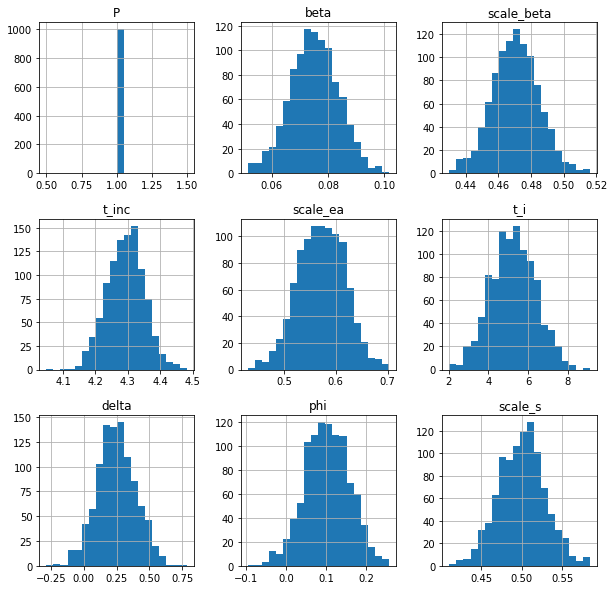

In [8]:
result = df[[p for p in df.columns if p is not 'id' ]].hist(figsize=(10,10), bins=20)

### 3. Represent correlation between parameters

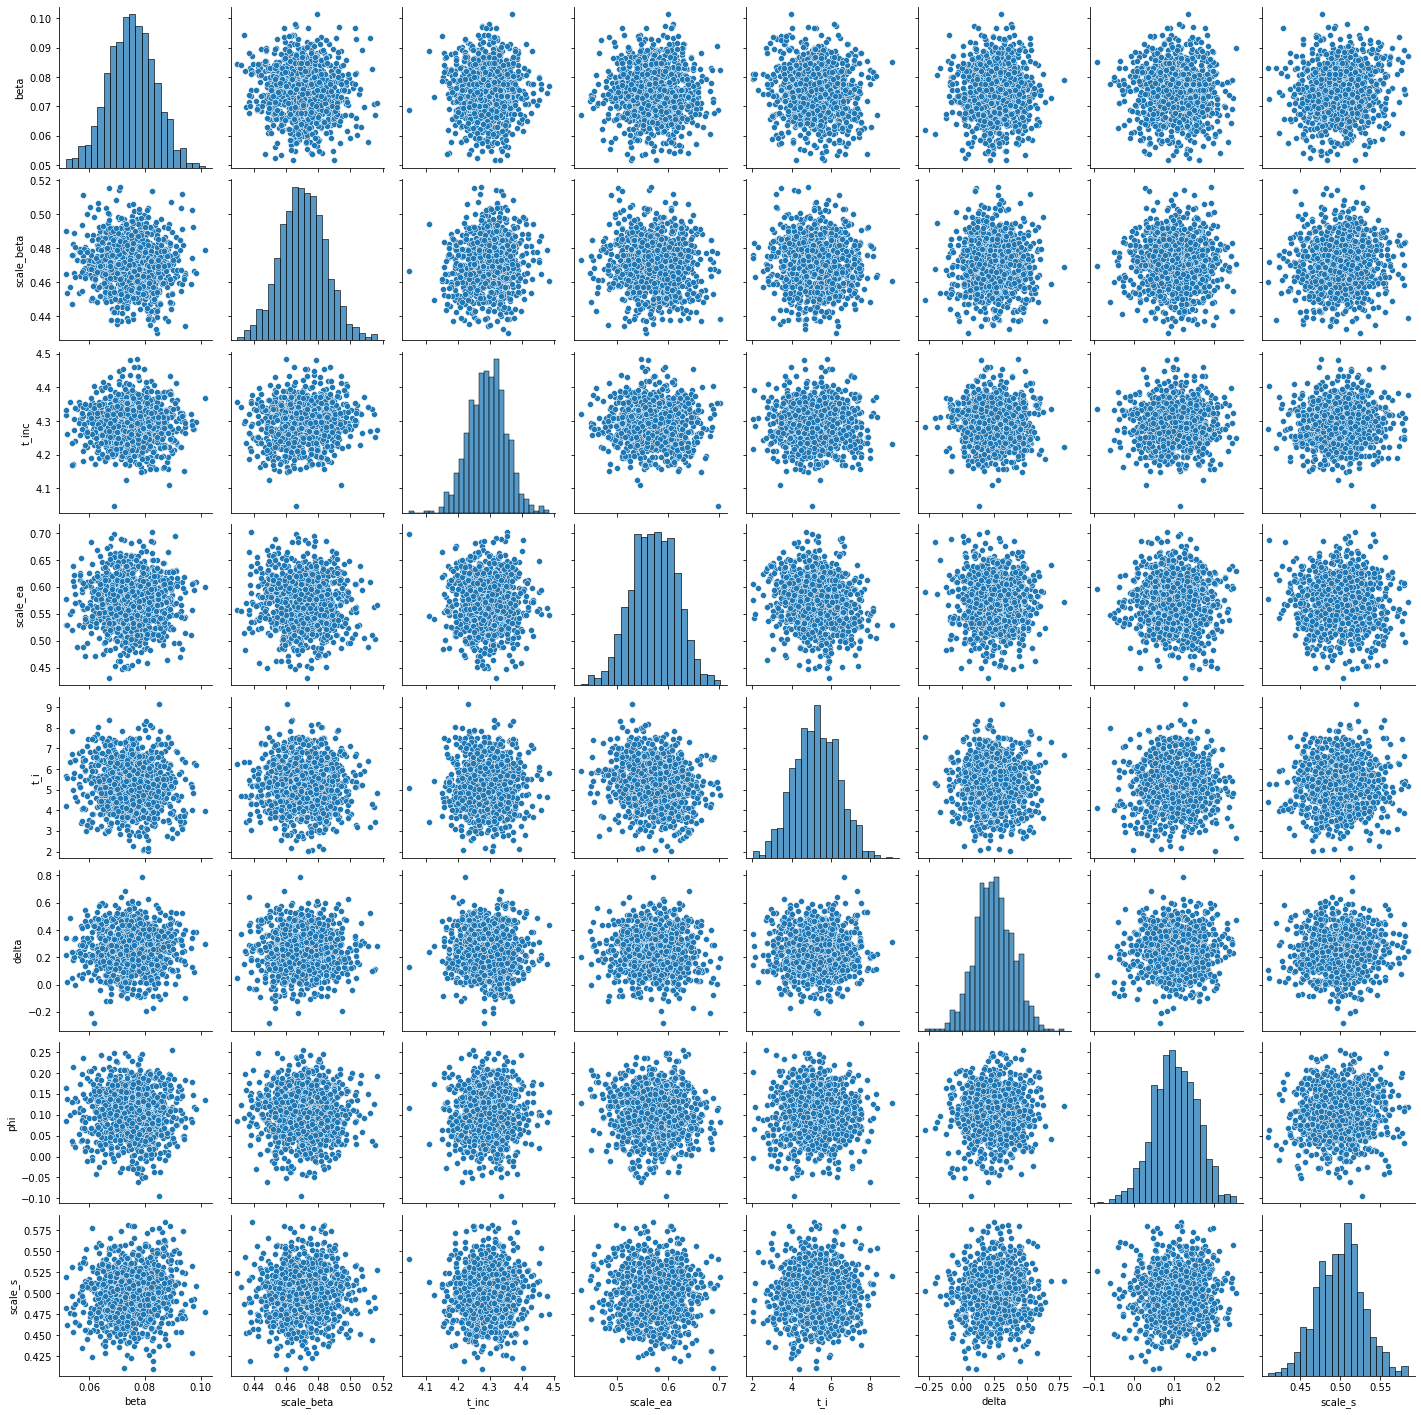

In [9]:
sns.pairplot(df[PARAMETER_COLUMNS[1:]])